In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\RD Engineering\Oasis Infobyte\Sales prediction\Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Data Cleaning

In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.drop(columns='Unnamed: 0',inplace=True)

In [11]:
df.shape

(200, 4)

In [12]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Exploratory Data Analysis

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


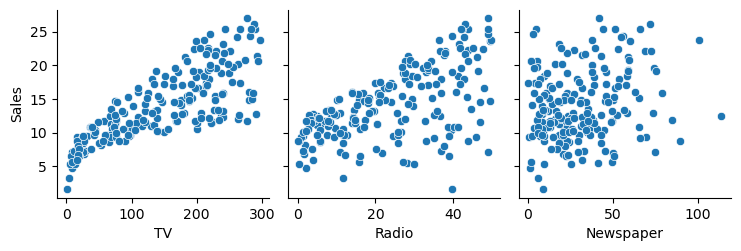

In [13]:
sns.pairplot(df, x_vars = ['TV','Radio','Newspaper'], y_vars = 'Sales', kind = 'scatter')
plt.show()

<Axes: xlabel='TV', ylabel='Frequency'>

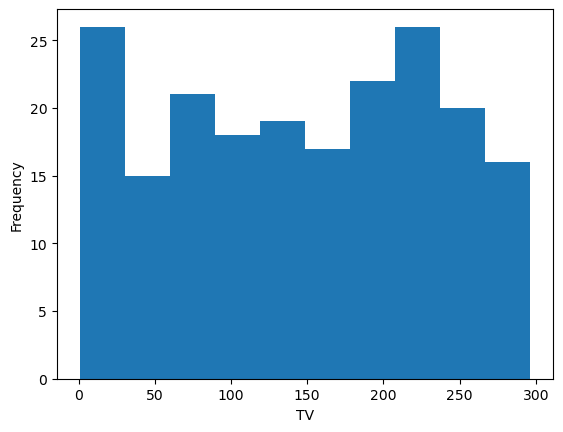

In [15]:
df['TV'].plot.hist(bins = 10, xlabel = 'TV')

<Axes: xlabel='Radio', ylabel='Frequency'>

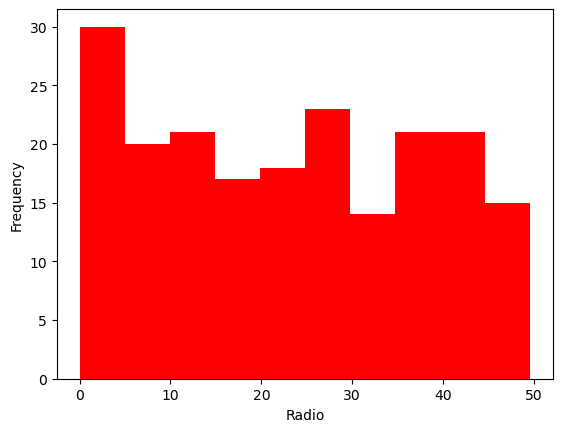

In [16]:
df['Radio'].plot.hist(bins = 10, color = 'red', xlabel = 'Radio')

<Axes: xlabel='Newspaper', ylabel='Frequency'>

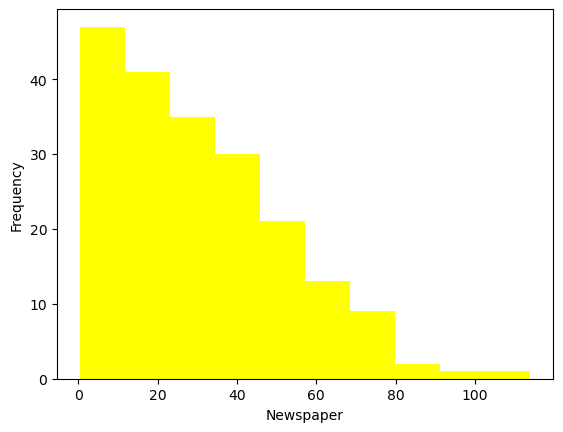

In [17]:
df['Newspaper'].plot.hist(bins = 10, color='yellow', xlabel = 'Newspaper')

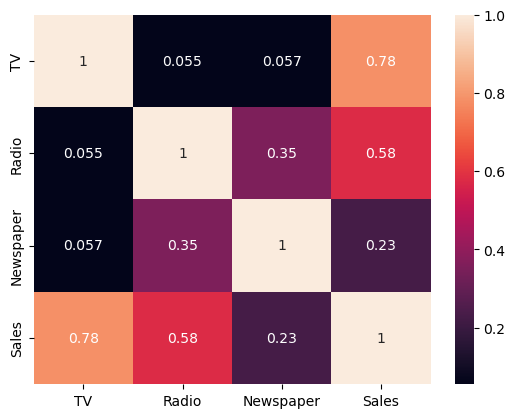

In [18]:
sns.heatmap(df.corr(), annot = True)
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


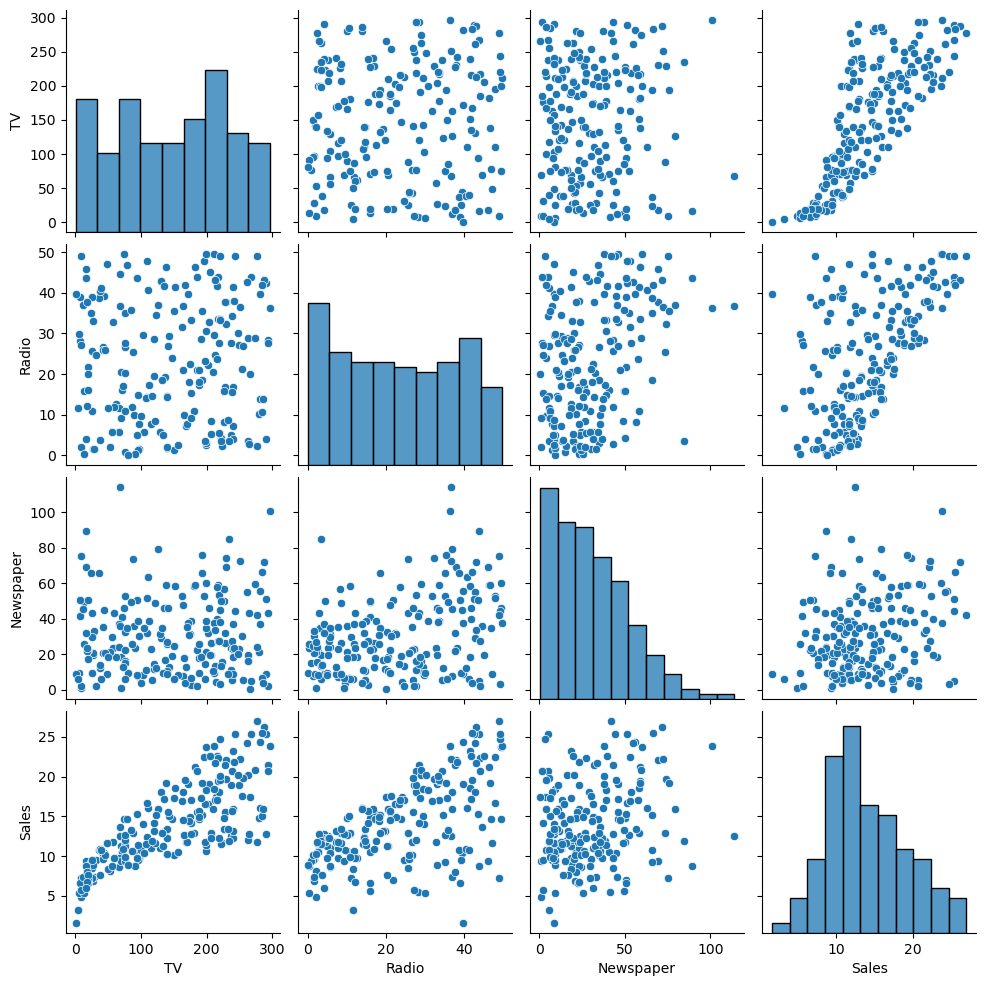

In [19]:
sns.pairplot(data = df)
plt.show()

# Model Training

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['TV','Radio','Newspaper']],df[['Sales']], test_size = 0.3, random_state = 43)

In [21]:
x_train

,TV,Radio,Newspaper
71,109.8,14.3,31.7
90,134.3,4.9,9.3
100,222.4,4.3,49.8
44,25.1,25.7,43.3
94,107.4,14.0,10.9
...,...,...,...
58,210.8,49.6,37.7
21,237.4,5.1,23.5
49,66.9,11.7,36.8
64,131.1,42.8,28.9


In [22]:
x_test

,TV,Radio,Newspaper
56,7.3,28.1,41.4
37,74.7,49.4,45.7
67,139.3,14.5,10.2
79,116.0,7.7,23.1
80,76.4,26.7,22.3
188,286.0,13.9,3.7
183,287.6,43.0,71.8
10,66.1,5.8,24.2
128,220.3,49.0,3.2
62,239.3,15.5,27.3


In [23]:
y_train

,Sales
71,12.4
90,11.2
100,11.7
44,8.5
94,11.5
...,...
58,23.8
21,12.5
49,9.7
64,18.0


In [24]:
y_test

,Sales
56,5.5
37,14.7
67,13.4
79,11.0
80,11.8
188,15.9
183,26.2
10,8.6
128,24.7
62,15.7


In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [33]:
y_pred = model.predict(x_test_scaled)
print(y_pred)

[[ 9.20909795]
 [16.41512219]
 [12.56341674]
 [10.15078767]
 [12.09267458]
 [19.07472005]
 [24.70150661]
 [ 7.52585778]
 [22.99609733]
 [17.23033898]
 [ 8.39472433]
 [23.79084655]
 [19.84106167]
 [ 5.87923276]
 [15.69987223]
 [10.56276051]
 [12.41868412]
 [10.49066898]
 [21.77108914]
 [ 9.69191181]
 [21.09504991]
 [13.08374991]
 [13.99778501]
 [11.0142619 ]
 [16.90364827]
 [ 8.45265922]
 [21.50504121]
 [21.063476  ]
 [ 9.70111267]
 [14.74753513]
 [17.83969409]
 [15.69890602]
 [17.90589176]
 [19.71546649]
 [17.67363311]
 [13.07432036]
 [13.33101057]
 [ 6.62577242]
 [10.45656428]
 [13.76284913]
 [12.48544626]
 [10.4338492 ]
 [ 5.90879506]
 [10.76545084]
 [14.72068001]
 [14.3118136 ]
 [14.87187402]
 [11.27117599]
 [21.98333019]
 [14.45204769]
 [ 7.06464819]
 [ 8.40648205]
 [18.64689271]
 [18.02872355]
 [12.93121754]
 [12.93340486]
 [21.50796341]
 [18.76170199]
 [ 4.96966242]
 [ 7.42451247]]


In [31]:
y_test

,Sales
56,5.5
37,14.7
67,13.4
79,11.0
80,11.8
188,15.9
183,26.2
10,8.6
128,24.7
62,15.7


In [42]:
model.coef_

array([[ 3.90837151,  2.74070708, -0.04370009]])

In [43]:
model.intercept_

array([14.16714286])

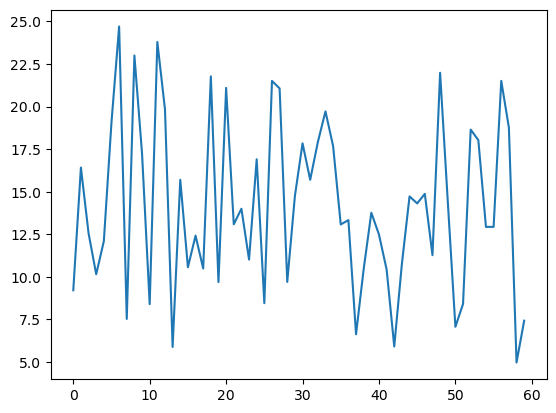

In [44]:
plt.plot(y_pred)

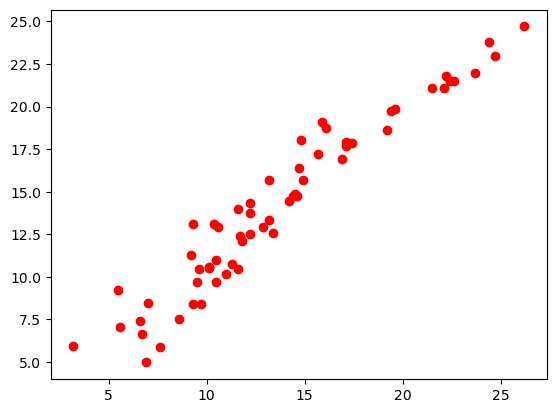

In [34]:
#y_test and result plotting
plt.scatter(y_test, y_pred, c='r')

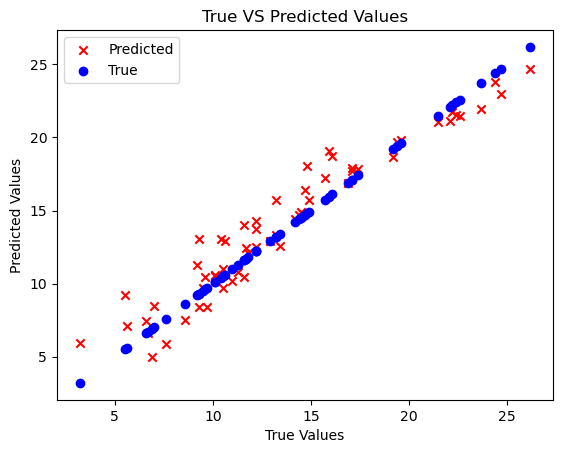

In [36]:
plt.scatter(y_test, y_pred, c='r', label='Predicted', marker='x')
plt.scatter(y_test, y_test, c='b', label='True', marker='o')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True VS Predicted Values')
plt.legend()
plt.show()

In [41]:
#check performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error: ',mse)
print('Mean Absolute Error: ',mae)
print('R2 Score: ',r2)

Mean Squared Error:  2.3254578823160186
Mean Absolute Error:  1.1857709854395644
R2 Score:  0.9191593340046744
